Figure successfully saved as corpus_composition_figure.png


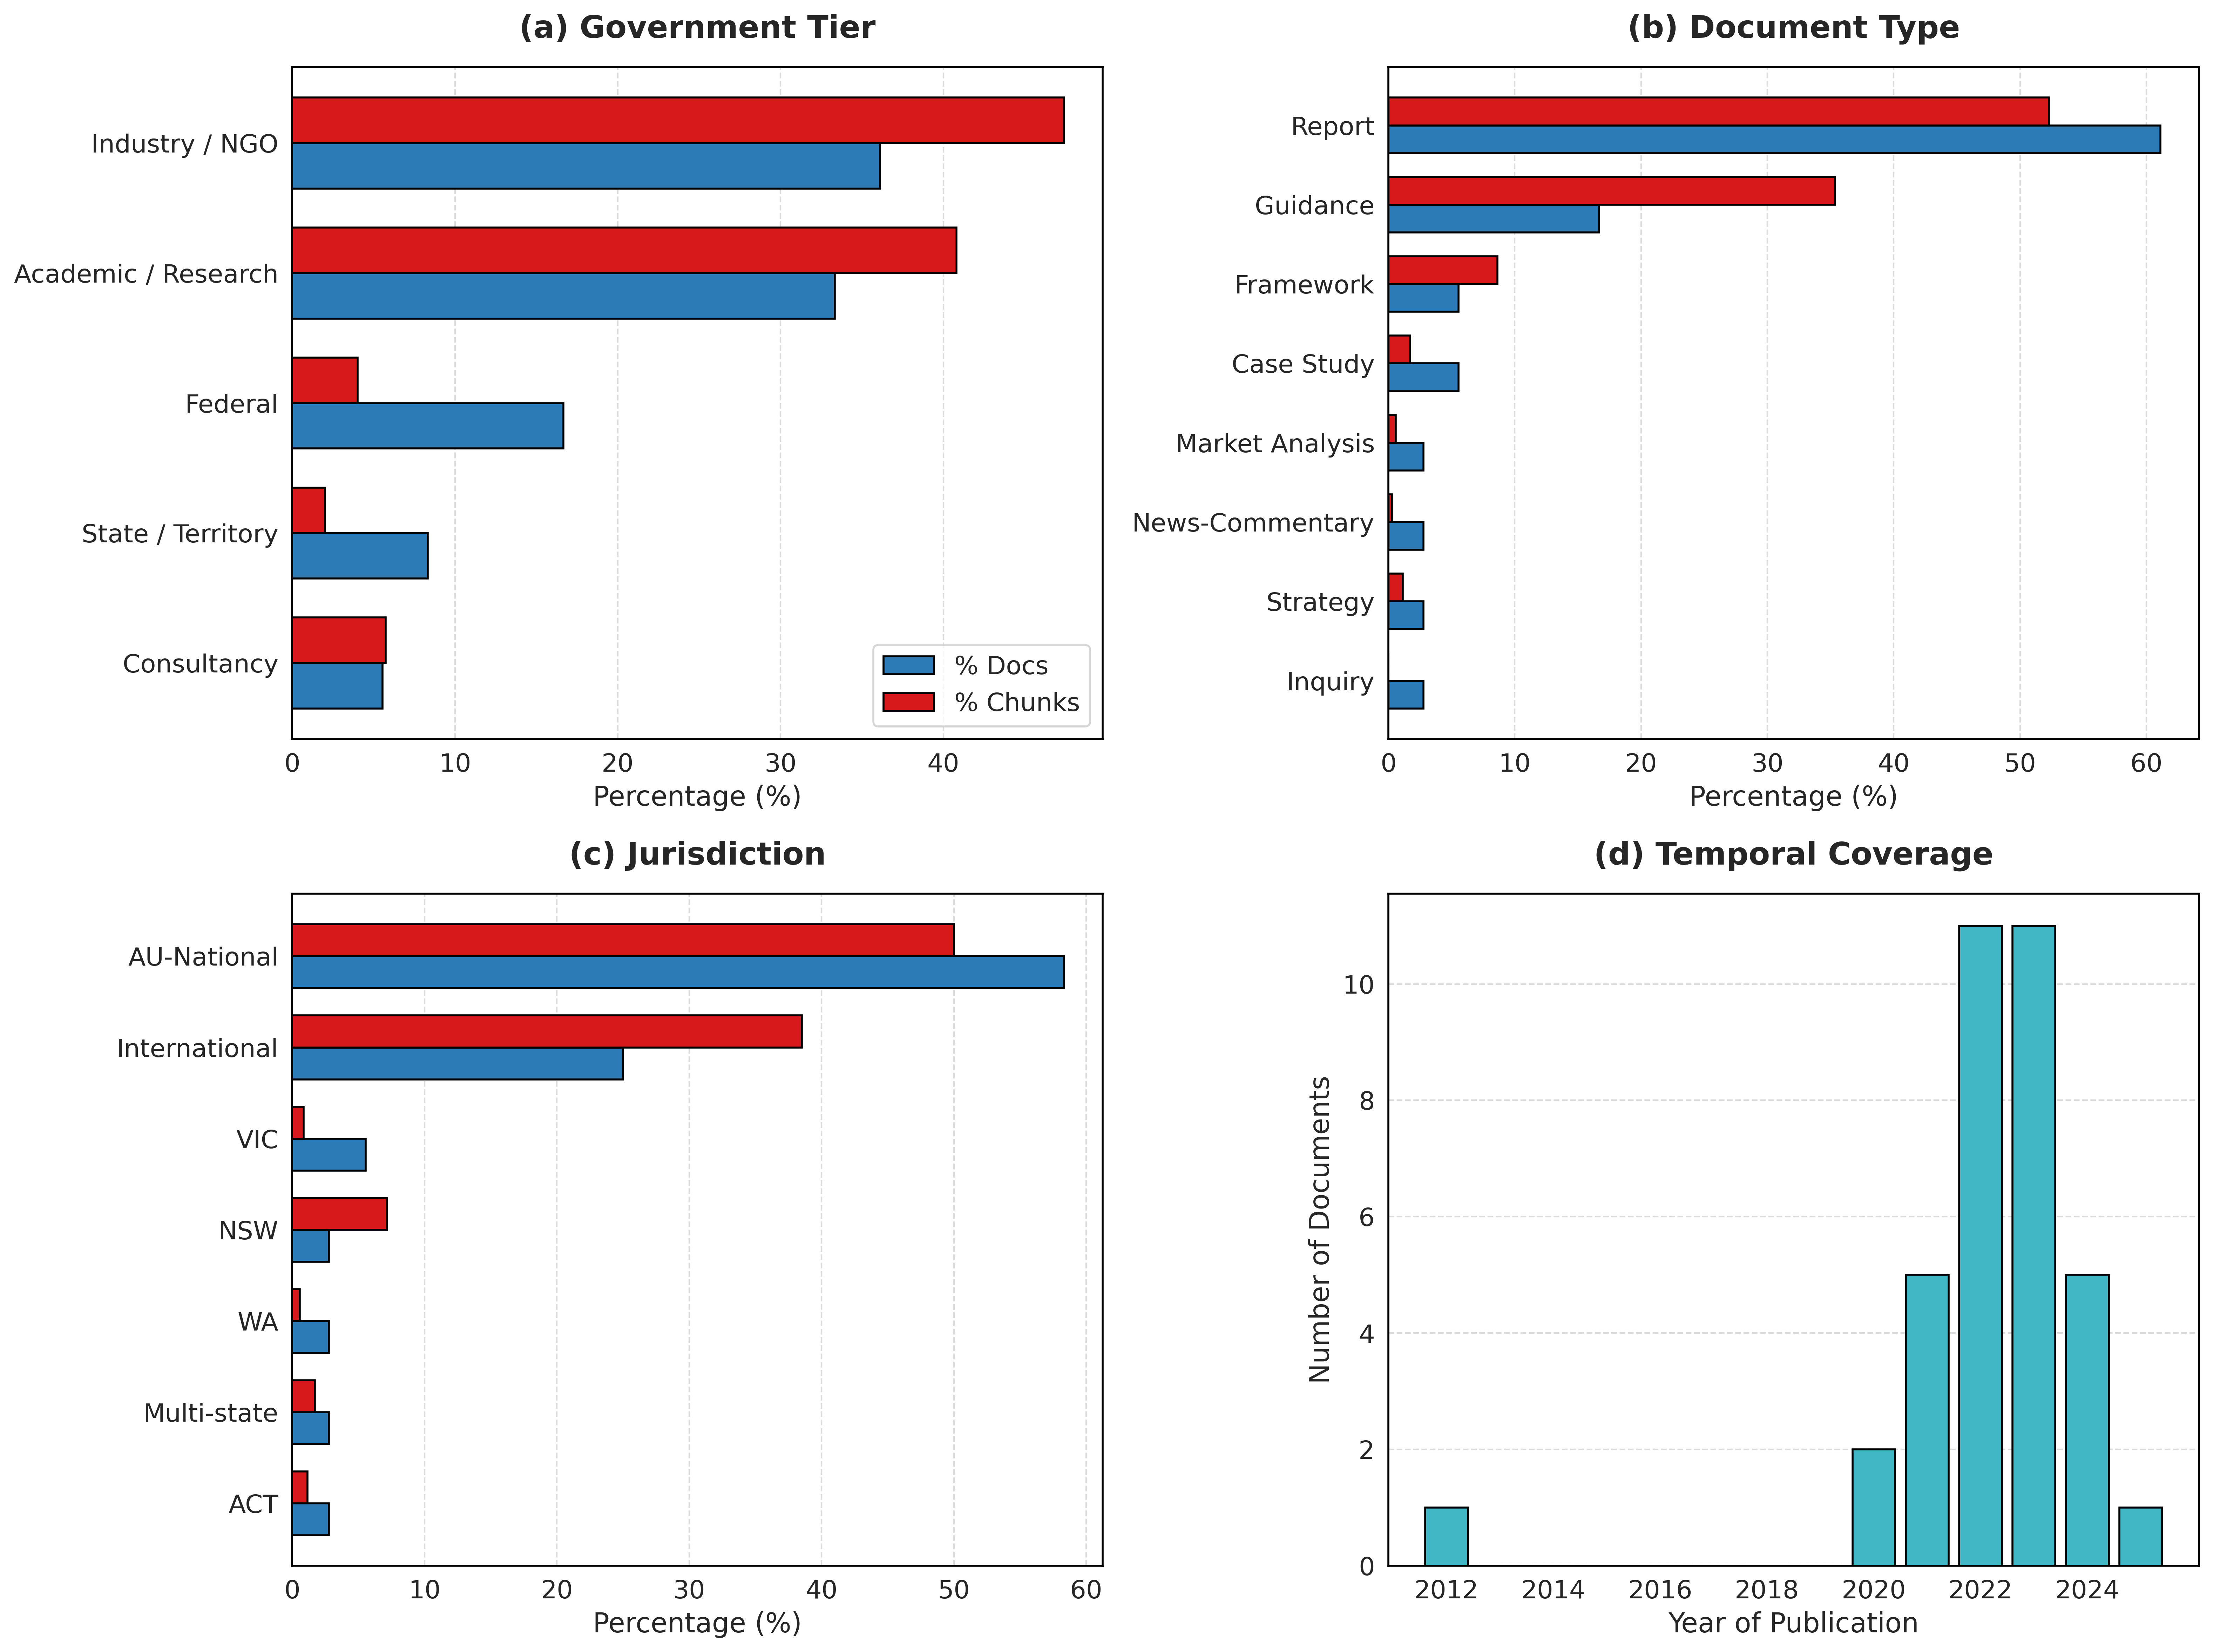

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Set academic style and high-resolution parameters
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 14,  # Increased from 12
    'axes.labelsize': 14, # Increased from 12
    'axes.titlesize': 16, # Increased from 14
    'xtick.labelsize': 13, # Increased from 11
    'ytick.labelsize': 13, # Increased from 11
    'legend.fontsize': 13, # Increased from 11
    'figure.dpi': 400, # Increased from 300
    'axes.edgecolor': 'black',
    'axes.linewidth': 1
})

# 2. Load the dataset
# Ensure 'corpus_composition.csv' is uploaded to your Colab workspace
df = pd.read_csv("corpus_composition.csv")

# Constants for totals based on your findings
TOTAL_DOCS = 36
TOTAL_CHUNKS = 348

# 3. Process Data for Panels
# (a) Tier Stats
tier_stats = df.groupby('tier_label').agg(
    doc_count=('source_file', 'count'),
    chunk_count=('chunk_count', 'sum')
).reset_index()

# Clean up long labels for the y-axis readability
tier_mapping = {
    'Non-Government (Industry / NGO)': 'Industry / NGO',
    'Non-Government (Academic / Research)': 'Academic / Research',
    'Non-Government (Consultancy / Commercial)': 'Consultancy',
    'Federal': 'Federal',
    'State / Territory': 'State / Territory'
}
tier_stats['tier_label'] = tier_stats['tier_label'].map(tier_mapping).fillna(tier_stats['tier_label'])
tier_stats['% Docs'] = (tier_stats['doc_count'] / TOTAL_DOCS) * 100
tier_stats['% Chunks'] = (tier_stats['chunk_count'] / TOTAL_CHUNKS) * 100
tier_stats = tier_stats.sort_values('% Docs', ascending=True)

# (b) Doc Type Stats
doc_stats = df.groupby('doc_type').agg(
    doc_count=('source_file', 'count'),
    chunk_count=('chunk_count', 'sum')
).reset_index()
doc_stats['% Docs'] = (doc_stats['doc_count'] / TOTAL_DOCS) * 100
doc_stats['% Chunks'] = (doc_stats['chunk_count'] / TOTAL_CHUNKS) * 100
doc_stats = doc_stats.sort_values('% Docs', ascending=True)

# (c) Jurisdiction Stats
jur_stats = df.groupby('jurisdiction').agg(
    doc_count=('source_file', 'count'),
    chunk_count=('chunk_count', 'sum')
).reset_index()
jur_stats['% Docs'] = (jur_stats['doc_count'] / TOTAL_DOCS) * 100
jur_stats['% Chunks'] = (jur_stats['chunk_count'] / TOTAL_CHUNKS) * 100
jur_stats = jur_stats.sort_values('% Docs', ascending=True)

# (d) Year Stats
# Ensure all years between 2012 and 2025 are represented even if zero
year_stats = df.groupby('year').agg(doc_count=('source_file', 'count')).reindex(range(2012, 2026)).fillna(0).reset_index()
year_stats.rename(columns={'index': 'year'}, inplace=True)

# 4. Plotting the Figure (2 Rows, 2 Columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # Changed to 2x2 grid and adjusted figsize

# Define colors suitable for publication
color_docs = '#2c7bb6'   # Blue
color_chunks = '#d7191c' # Red

# Helper function to plot grouped horizontal bar charts
def plot_hbar(ax, data, label_col, title):
    y = np.arange(len(data))
    height = 0.35

    # Plot bars
    ax.barh(y - height/2, data['% Docs'], height, label='% Docs', color=color_docs, edgecolor='black')
    ax.barh(y + height/2, data['% Chunks'], height, label='% Chunks', color=color_chunks, edgecolor='black')

    # Formatting
    ax.set_yticks(y)
    ax.set_yticklabels(data[label_col])
    ax.set_xlabel('Percentage (%)')
    ax.set_title(title, fontweight='bold', pad=15)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.grid(axis='y', visible=False)

# Render Panels (a) to (c) - adjusted indexing for 2x2 grid
plot_hbar(axes[0, 0], tier_stats, 'tier_label', '(a) Government Tier')
axes[0, 0].legend(loc='lower right')

plot_hbar(axes[0, 1], doc_stats, 'doc_type', '(b) Document Type')
plot_hbar(axes[1, 0], jur_stats, 'jurisdiction', '(c) Jurisdiction')

# Render Panel (d) - Temporal Coverage (Vertical Bar Chart) - adjusted indexing
axes[1, 1].bar(year_stats['year'], year_stats['doc_count'], color='#41b6c4', edgecolor='black')
axes[1, 1].set_title('(d) Temporal Coverage', fontweight='bold', pad=15)
axes[1, 1].set_ylabel('Number of Documents')
axes[1, 1].set_xlabel('Year of Publication')
axes[1, 1].set_xticks(range(2012, 2026, 2))
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 1].grid(axis='x', visible=False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# 5. Save and Display
output_filename = 'corpus_composition_figure.png'
plt.savefig(output_filename, dpi=800, bbox_inches='tight') # Increased from 600
print(f"Figure successfully saved as {output_filename}")
plt.show()

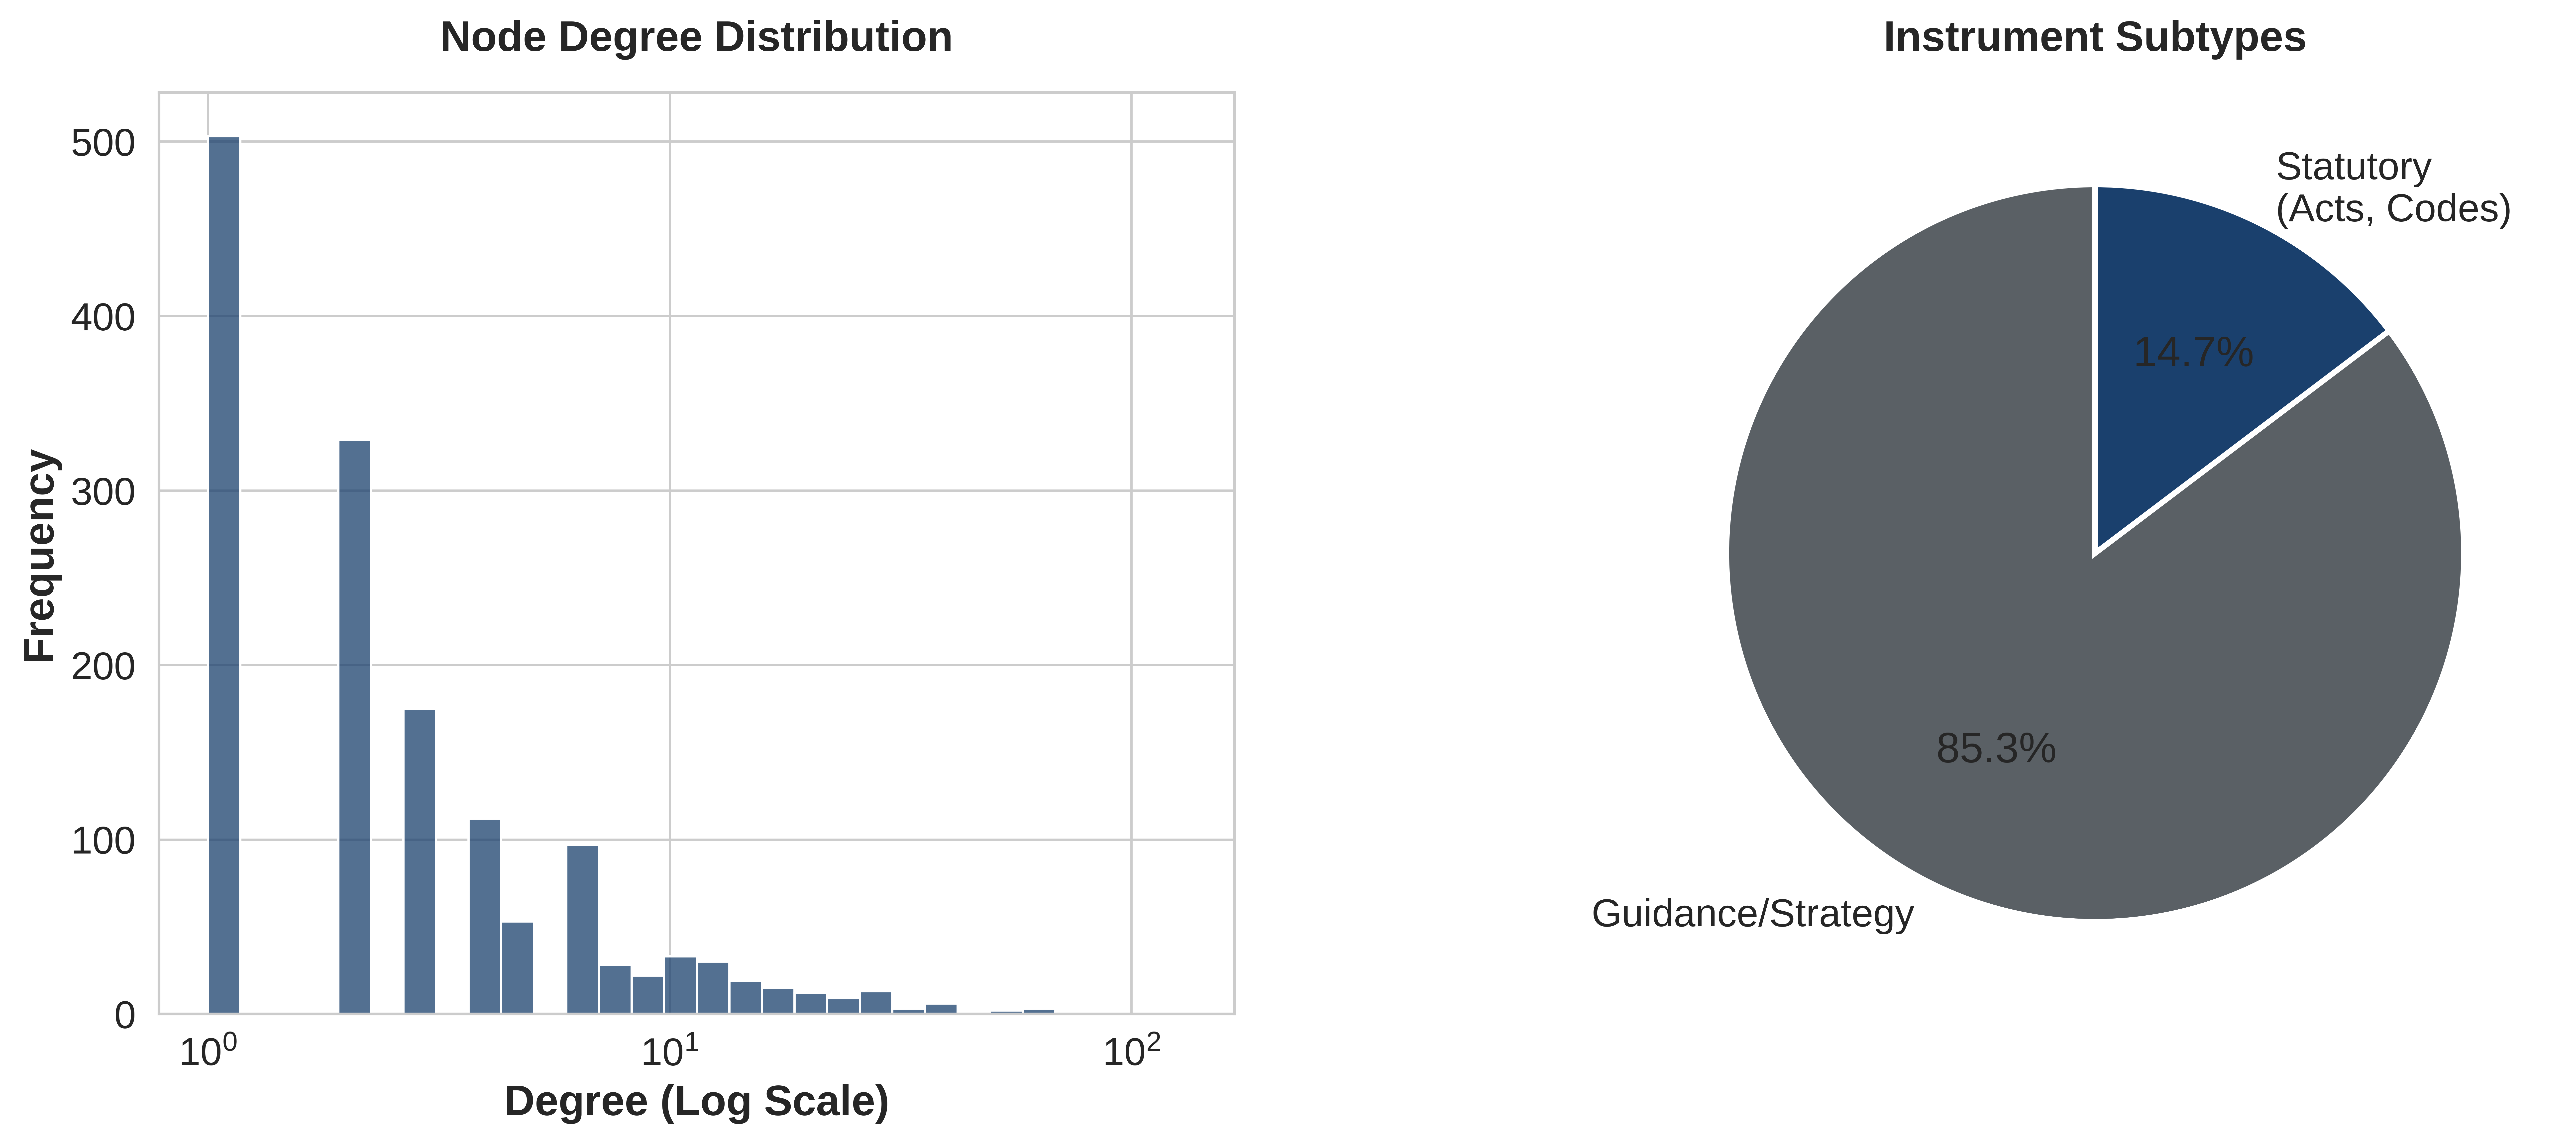

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Set academic plotting style with larger fonts
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.6) # Increased font scale for readability
academic_blue = "#1A406D"
academic_grey = "#5A6065"
highlight_color = "#C84B31"

# 1. Load Data
nodes_df = pd.read_csv('nodes_clean.csv')
edges_df = pd.read_csv('edges_clean.csv')

# 2. Prepare Data
# --- Entity Types ---
entity_counts = nodes_df['entity_type'].value_counts()

# --- Relation Types ---
relation_counts = edges_df['predicate'].value_counts()

# --- Degree Distribution ---
G = nx.from_pandas_edgelist(edges_df, source='subject_id', target='object_id', create_using=nx.MultiDiGraph())
degrees = [deg for node, deg in G.degree()]
degree_df = pd.DataFrame(degrees, columns=['Degree'])

# --- Instrument Subtypes ---
instruments = nodes_df[nodes_df['entity_type'] == 'Instrument'].copy()
statutory_keywords = ['Act', 'Regulation', 'Bill', 'Code', 'Directive']
instruments['is_statutory'] = instruments['name'].str.contains('|'.join(statutory_keywords), case=False, na=False)
instrument_counts = instruments['is_statutory'].value_counts().rename(index={True: 'Statutory\n(Acts, Codes)', False: 'Guidance/Strategy'})

# ---------------------------------------------------------
# 3. Create Figure 5: Entity and Relation Distributions
# ---------------------------------------------------------
fig1, axes1 = plt.subplots(1, 2, figsize=(16, 6), dpi=800)
fig1.subplots_adjust(wspace=0.3)

# Entity Distribution
sns.barplot(x=entity_counts.values, y=entity_counts.index, ax=axes1[0], color=academic_blue)
axes1[0].set_title('Entity Type Distribution', fontweight='bold', pad=15)
axes1[0].set_xlabel('Number of Nodes', fontweight='bold')
axes1[0].set_ylabel('')

# Relation Distribution
sns.barplot(x=relation_counts.values, y=relation_counts.index, ax=axes1[1], color=academic_grey)
# Highlight REQUIRES vs ENABLES/INVOLVES
for i, bar in enumerate(axes1[1].patches):
    if relation_counts.index[i] in ['REQUIRES', 'PROHIBITS']:
        bar.set_color(highlight_color)
axes1[1].set_title('Relation Type Distribution', fontweight='bold', pad=15)
axes1[1].set_xlabel('Number of Edges', fontweight='bold')
axes1[1].set_ylabel('')

plt.savefig('Figure_5_Entity_Relation.png', bbox_inches='tight')
plt.show()

# ---------------------------------------------------------
# 4. Create Figure 6: Degree Distribution and Instrument Subtypes
# ---------------------------------------------------------
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 6), dpi=800)
fig2.subplots_adjust(wspace=0.3)

# Degree Distribution
sns.histplot(degree_df['Degree'], bins=30, ax=axes2[0], color=academic_blue, log_scale=(True, False))
axes2[0].set_title('Node Degree Distribution', fontweight='bold', pad=15)
axes2[0].set_xlabel('Degree (Log Scale)', fontweight='bold')
axes2[0].set_ylabel('Frequency', fontweight='bold')

# Instrument Subtypes
axes2[1].pie(instrument_counts, labels=instrument_counts.index, autopct='%1.1f%%',
             colors=[academic_grey, academic_blue], startangle=90,
             wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes2[1].set_title('Instrument Subtypes', fontweight='bold', pad=15)

plt.savefig('Figure_6_Topology_Instruments.png', bbox_inches='tight')
plt.show()